In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("CO2 Emissions_Canada.csv")

In [3]:
data.head()


,Make,Model,Vehicle_Class,Engine_Size_L_,Cylinders,Transmission,Fuel_Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions_g_km_
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
v1 = data['Fuel Consumption City (L/100 km)']
v2 = data['Fuel Consumption Hwy (L/100 km)']
v3 = data['Fuel Consumption Comb (L/100 km)']
A = np.column_stack([v1, v2])
x = np.linalg.lstsq(A, v3)
print(x[0])

[0.54977202 0.45035134]


<ipython-input-4-ec23ce957547>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, v3)


In [5]:
avg = np.round(np.average([data['Fuel Consumption City (L/100 km)'],data['Fuel Consumption Hwy (L/100 km)']], weights=x[0], axis=0),1)
print('avg formula ' ,avg[:5], ' equals to ', 'Fuel Consumption Comb ', list(data['Fuel Consumption Comb (L/100 km)'].iloc[:5]))
difference = np.abs(data['Fuel Consumption Comb (L/100 km)']-avg)
print('The average difference is: ',np.round(np.average(difference),3),'(L/100 km)')
print('The max difference is: ',np.max(difference),'(L/100 km)')

avg formula  [ 8.5  9.6  5.9 11.1 10.6]  equals to  Fuel Consumption Comb  [8.5, 9.6, 5.9, 11.1, 10.6]
The average difference is:  0.017 (L/100 km)
The max difference is:  0.5 (L/100 km)


In [6]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle_Class                       0
Engine_Size_L_                      0
Cylinders                           0
Transmission                        0
Fuel_Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2_Emissions_g_km_                 0
dtype: int64

In [7]:
data.describe()

,Engine_Size_L_,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions_g_km_
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
data.describe(include=['O'])

<bound method NDFrame.describe of        Make        Model   Vehicle_Class  Engine_Size_L_  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel_Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                     

In [20]:
data.describe(include=['O'])

,Make,Model,Vehicle_Class,Transmission,Fuel_Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


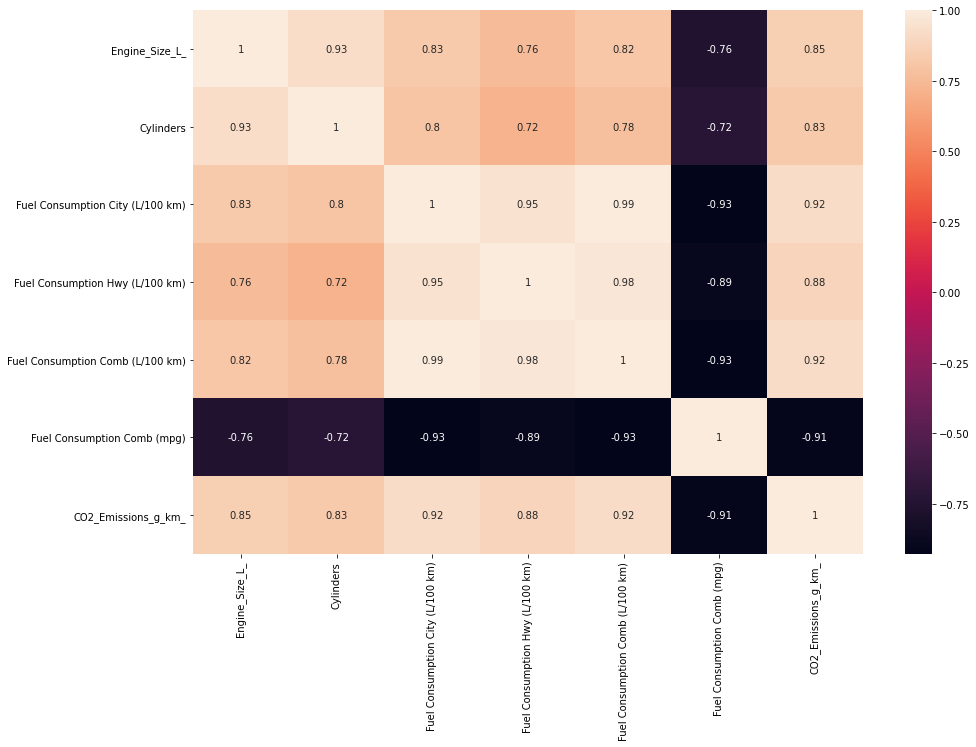

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

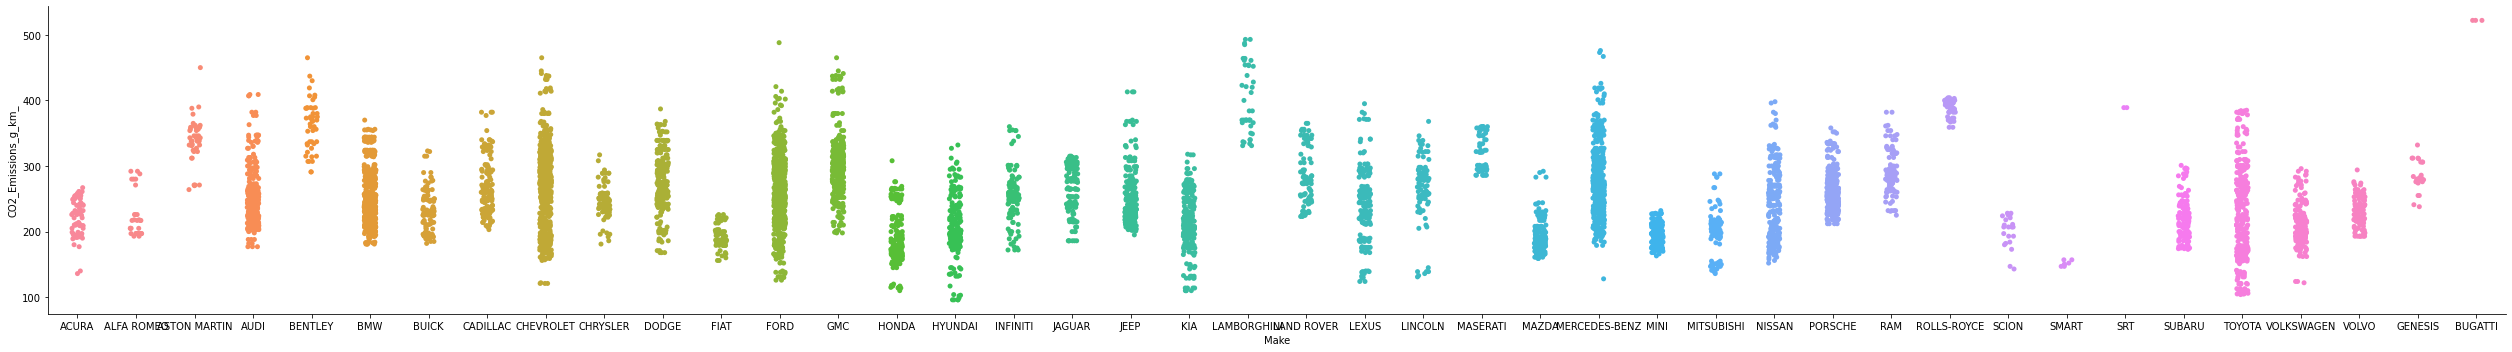

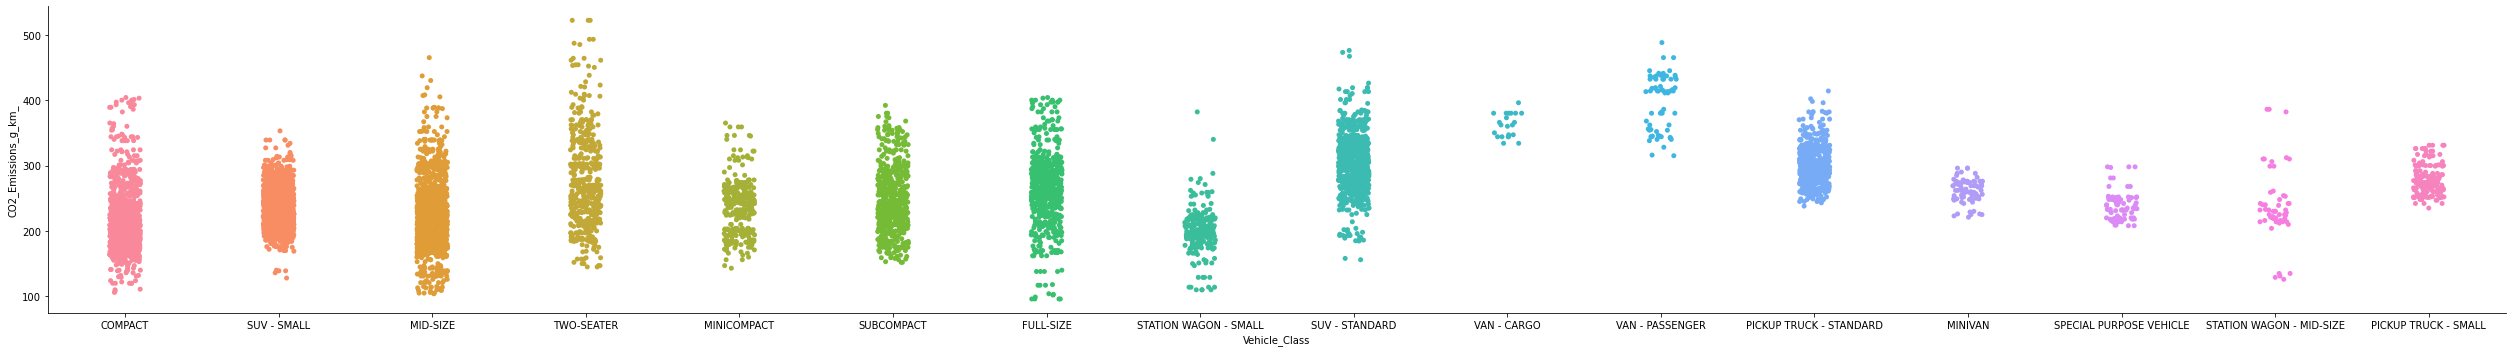

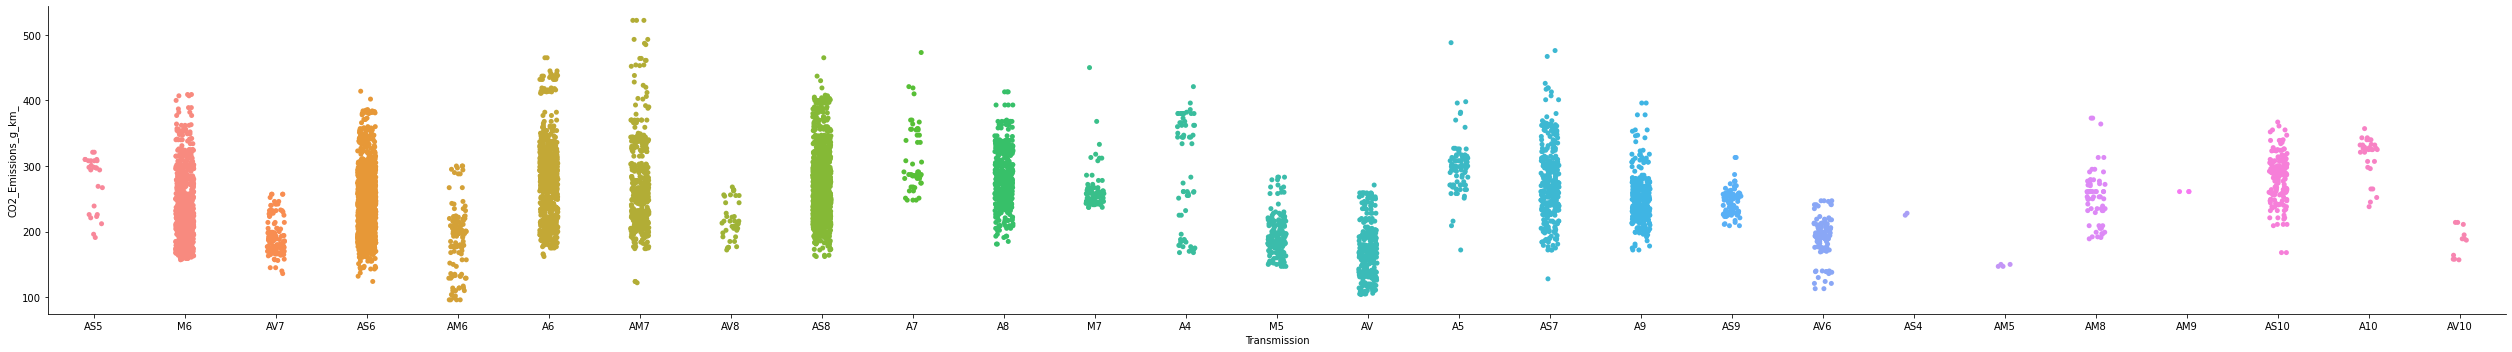

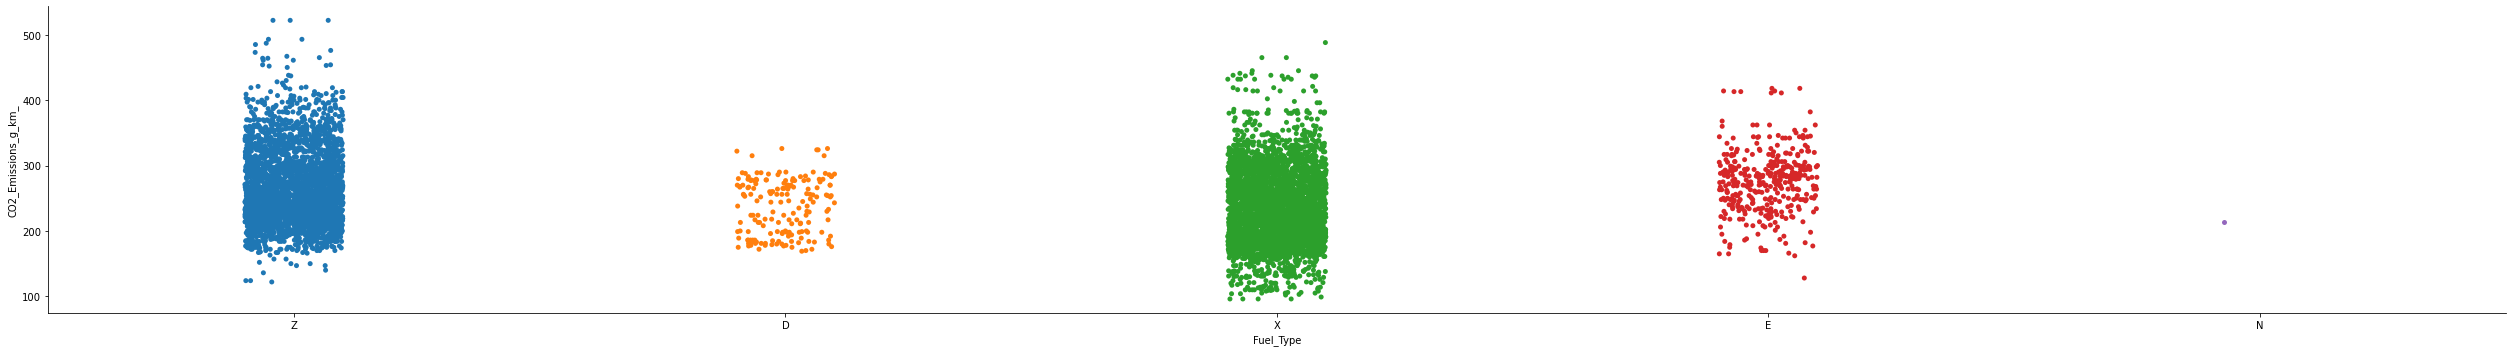

In [10]:
comparing = data.select_dtypes(exclude=['float64', 'int64'])
col = comparing.columns
col = col.drop('Model')#more than 2000 different items..  
for feature in col:
  sns.catplot(x=feature, y="CO2_Emissions_g_km_", data=data, aspect=7)

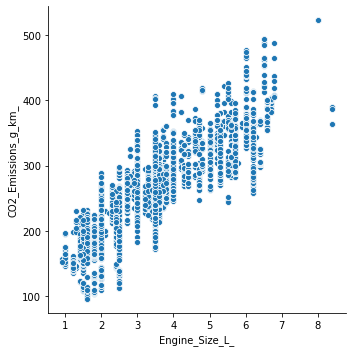

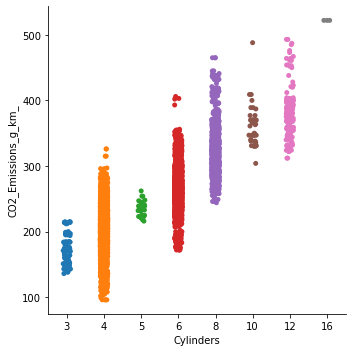

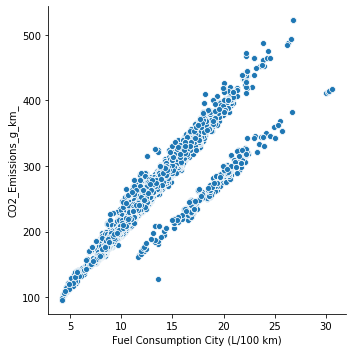

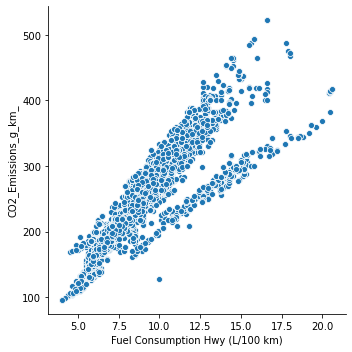

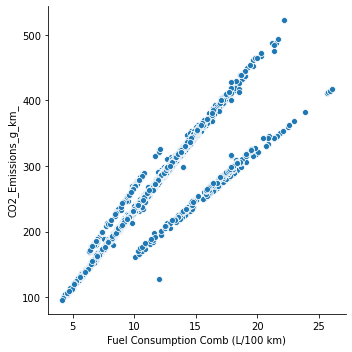

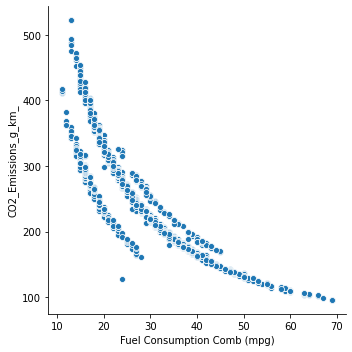

In [11]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
numerical_data = numerical_data.drop("CO2_Emissions_g_km_", axis =1)
col = numerical_data.columns
n_un = numerical_data.nunique()

for id, feature in enumerate(col):
  if n_un[id] <30:
    sns.catplot(x=feature, y="CO2_Emissions_g_km_", data=data)
  else:
    sns.relplot(x=feature, y='CO2_Emissions_g_km_', data= data)

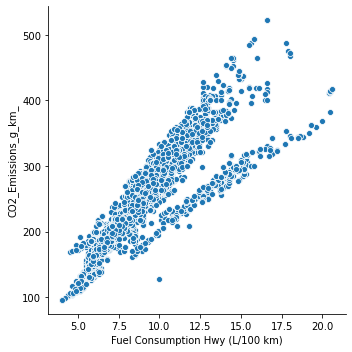

In [12]:
sns.relplot(x='Fuel Consumption Hwy (L/100 km)', y='CO2_Emissions_g_km_', data= data)

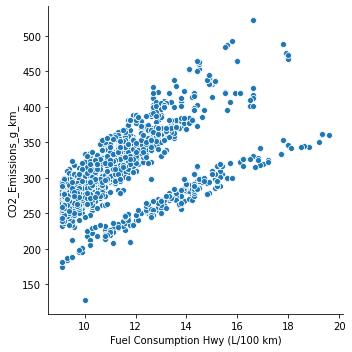

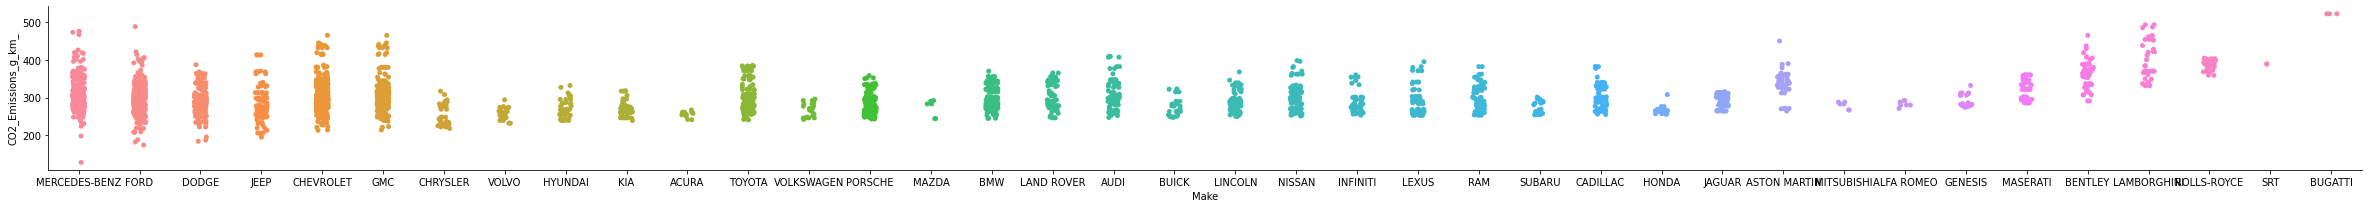

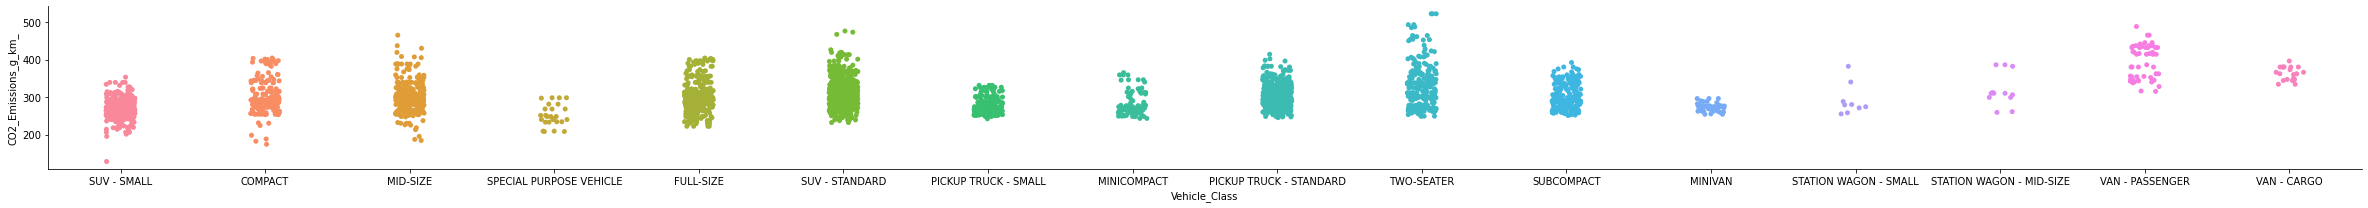

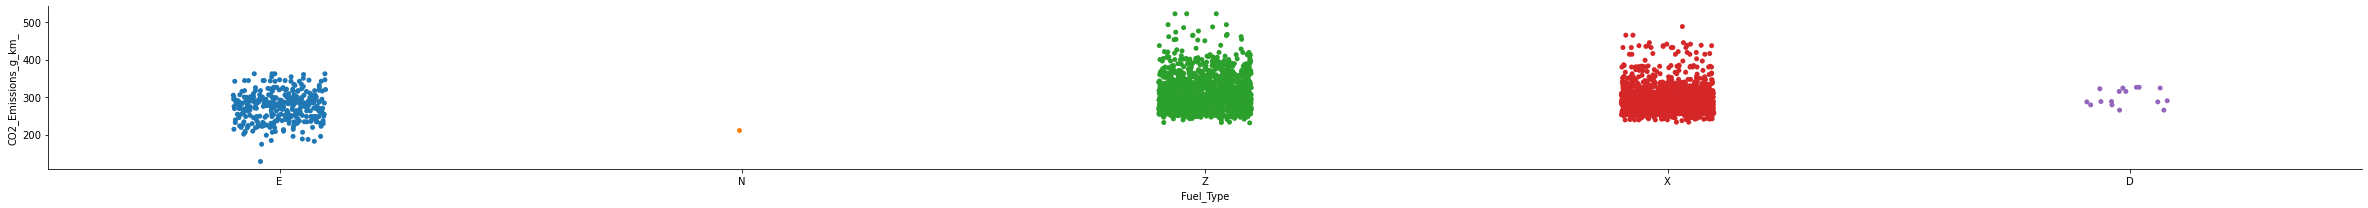

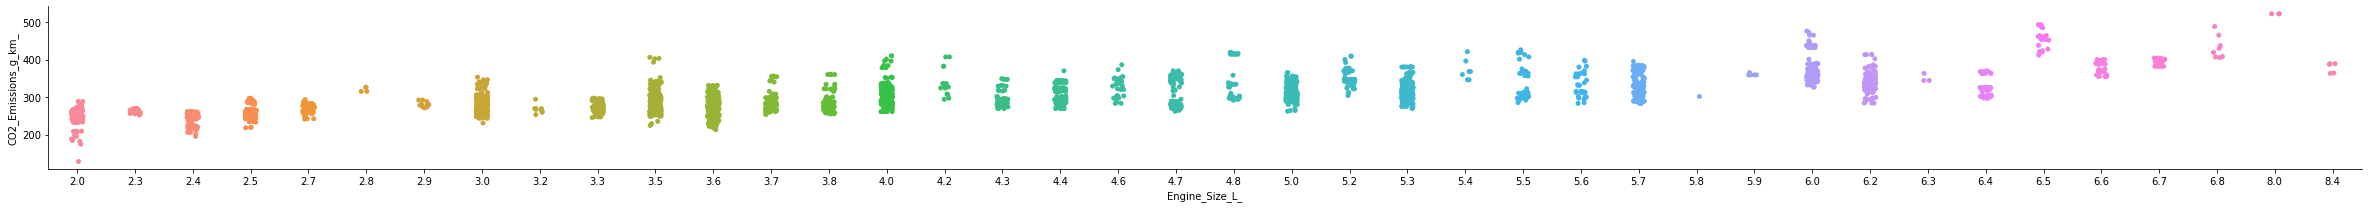

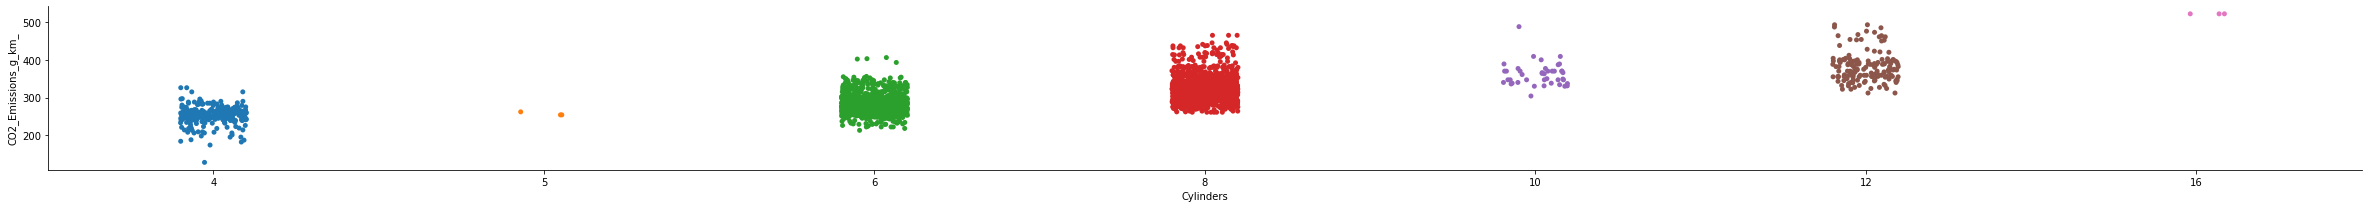

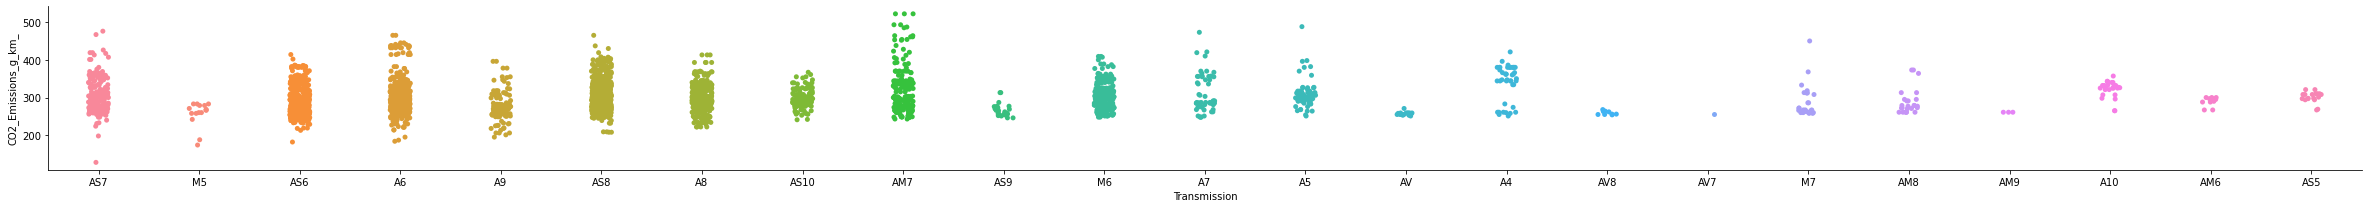

In [13]:
new_data = data.loc[data['Fuel Consumption Hwy (L/100 km)']<20]

new_data = new_data.loc[new_data['Fuel Consumption Hwy (L/100 km)']>9]

s = new_data.sort_values(by= 'CO2_Emissions_g_km_', ignore_index=True)

feature_to_compare = ['Make', 'Vehicle_Class', 'Fuel_Type', 'Engine_Size_L_', 'Cylinders', 'Transmission']

sns.relplot(x='Fuel Consumption Hwy (L/100 km)', y='CO2_Emissions_g_km_', data= new_data)

for f in feature_to_compare:
  sns.catplot(x=f, y="CO2_Emissions_g_km_", data=s, height=3, aspect=11)

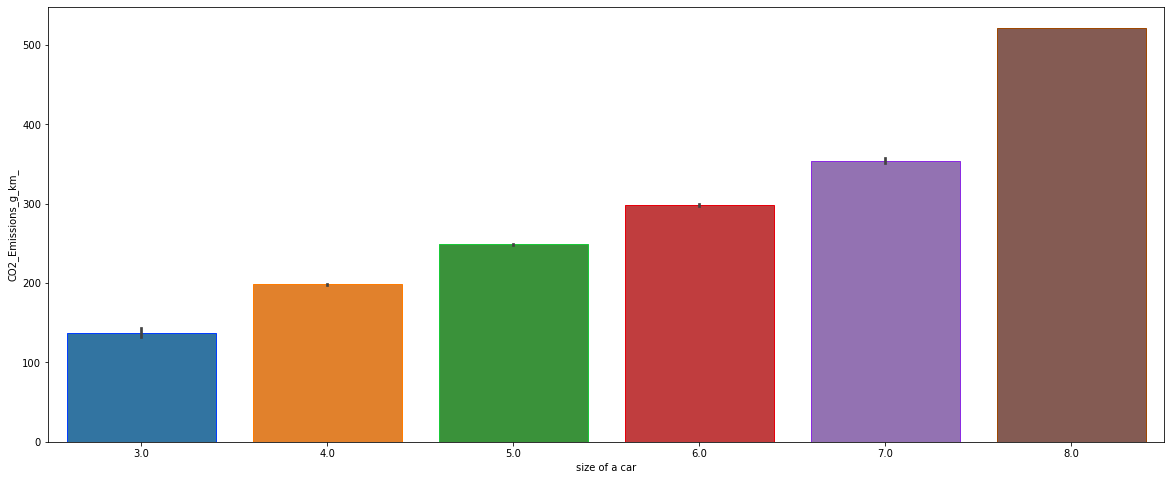

In [14]:
data['siza-'] = np.round(np.log(data['Engine_Size_L_'] * data['Cylinders'] * data['Fuel Consumption Comb (L/100 km)']))
plt.figure(figsize=(20,8))
sns.barplot(x = "size of a car",y="CO2_Emissions_g_km_",data = data,
            edgecolor=sns.color_palette("bright", 6))

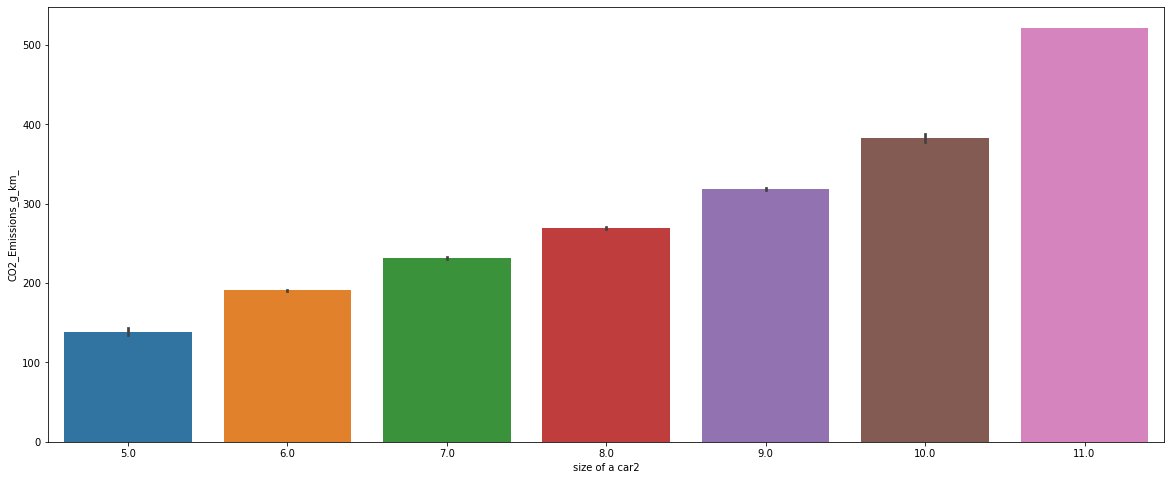

In [15]:
data['size of a car2'] = np.round(np.log(data['Engine_Size_L_'] * data['Cylinders'] * data['Fuel Consumption Hwy (L/100 km)']*data['Fuel Consumption City (L/100 km)']))
plt.figure(figsize=(20,8))
sns.barplot(x = "size of a car2",y="CO2_Emissions_g_km_",data = data)

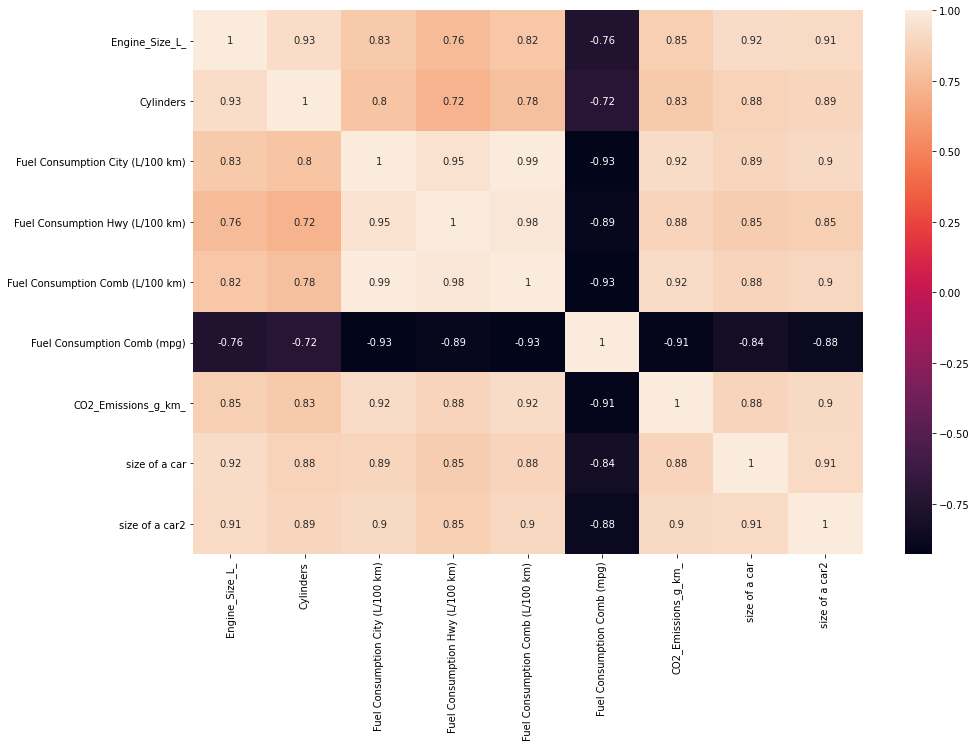

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [17]:
data.nunique()

Make                                  42
Model                               2053
Vehicle_Class                         16
Engine_Size_L_                        51
Cylinders                              8
Transmission                          27
Fuel_Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2_Emissions_g_km_                  331
size of a car                          6
size of a car2                         7
dtype: int64

In [18]:
data_with_duplicates = data.copy()
data_to_duplicates = ['Make','Vehicle_Class','Cylinders','Transmission','Fuel_Type']
perfix_for_data = ['Make','Cls','Cyl','Trans','F']
for col, per in zip(data_to_duplicates, perfix_for_data):
  dummi = pd.get_dummies(data_with_duplicates[col], prefix=per, drop_first=True)
  data_with_duplicates = data_with_duplicates.join(dummi)
    
labels = data_with_duplicates['CO2_Emissions_g_km_']

data_to_drop = data_to_duplicates+['Model', 'CO2_Emissions_g_km_']

data_to_drop

['Make',
 'Vehicle_Class',
 'Cylinders',
 'Transmission',
 'Fuel_Type',
 'Model',
 'CO2_Emissions_g_km_']

In [21]:
final_data = data_with_duplicates.drop(data_to_drop, axis=1)
final_data.head()

,Engine_Size_L_,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),size of a car,size of a car2,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Trans_AV6,Trans_AV7,Trans_AV8,Trans_M5,Trans_M6,Trans_M7,F_E,F_N,F_X,F_Z
0,2.0,9.9,6.7,8.5,33,4.0,6.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,11.2,7.7,9.6,29,5.0,7.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,6.0,5.8,5.9,48,4.0,5.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.5,12.7,9.1,11.1,25,5.0,8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,12.1,8.7,10.6,27,5.0,8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [23]:
X_train, X_test, y_train, y_test = train_test_split(final_data, labels, test_size= 0.3, random_state=42)


In [24]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test,y_test)

0.9916642193722217

In [25]:
rf = RandomForestRegressor().fit(X_train, y_train)
rf.score(X_test,y_test)

0.9953005437313505

In [26]:
kn = KNeighborsRegressor().fit(X_train, y_train)
kn.score(X_test,y_test)

0.9889916833860581

In [27]:
kn = KNeighborsRegressor(algorithm= 'brute', leaf_size= 10, weights= 'distance').fit(X_train, y_train)
kn.score(X_test,y_test)

0.9921603697347018